In [127]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
sns.set_style("darkgrid")
sns.set_theme(font_scale = 1, palette= "crest")

### Importing the Data

The data is comma seperated, and the raw data being read from absolulute directory /data/raw/

In [63]:
df = pd.read_csv("../data/raw/autoscout24-germany-dataset.csv")

display(df)

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011
...,...,...,...,...,...,...,...,...,...
46400,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46401,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46402,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46403,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021


### Cleaning Data

The data is 99.3% complete, but unfortunately there are 334 rows (out of 46405 rows) that contain incomplete information about the vehicle.
- Mileage, make, fuel, offerType, price, and year contain complete information.
- 143 rows contain missing vehicle model, for these cases I am going to replace the blank space with "Unknown" since the data associated with the vehicle is still valuable even if the model is unkown.
- 182 rows contain missing transmission information, these will be dropped since this column will be converted to a numeric later.
- 29 vehicles are missing their horsepower, I am going to delete these few rows since they are inconsequencial compared to the size of the data set and provide little use with such an impactful metric missing
- There are 23 vehicles with brand "Others", these vehicles provide no insight into make/model or any other correlations that can be drawn thus they are dropped from the dataframe.
- In between each of the row drop operations, the row index's are re-indexed from 0 for the next row drop operation.
- I find "gear" a little odd, I prefer to use "transmission" so I am going to rename the column.

In [88]:
df = pd.read_csv("../data/raw/autoscout24-germany-dataset.csv")

df["model"] = df["model"].fillna("Unknown")

df = df.drop(df[df["gear"].isna()].index)

df = df.reset_index()
df = df.drop("index", axis = "columns")

df = df.drop(df[df["hp"].isna()].index)

df = df.reset_index()
df = df.drop("index", axis = "columns")

df = df.drop(df[df["make"] == "Others"].index)

df = df.reset_index()
df = df.drop("index", axis = "columns")

df["transmission"] = df["gear"]
df = df.drop("gear", axis = "columns")

df = df[["mileage", "make", "model", "fuel", "transmission", "offerType", "price", "hp", "year"]]

display(df)

,mileage,make,model,fuel,transmission,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011
...,...,...,...,...,...,...,...,...,...
46175,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46176,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46177,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46178,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021


### DataFrame from external script

This section is the same content as the previous, except all of the methods called are wrapped into one method chain that are avaliable in an external python file.

In [63]:
from scripts import project_functions as projf
import importlib
importlib.reload(projf)

df = projf.load_and_process("../data/raw/autoscout24-germany-dataset.csv")
display(df)

,mileage,make,model,fuel,transmission,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011
...,...,...,...,...,...,...,...,...,...
46175,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46176,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46177,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46178,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021


# Exploratory Data Analysis

### Feel for the variables

First I find the size of the dataset. Then take a peak at the first 5 rows of the dataframe, and print the column names.

In [33]:
display(df.shape, df.head(), df.columns)

(46180, 9)

,mileage,fuel,model,fuel,transmission,offerType,price,hp,year
0,235000,Diesel,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Gasoline,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,Gasoline,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Gasoline,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Gasoline,308,Gasoline,Manual,Used,6950,156.0,2011


Index(['mileage', 'fuel', 'model', 'fuel', 'transmission', 'offerType',
       'price', 'hp', 'year'],
      dtype='object')

Now to get a better sense of the values that the columns take I use the describe method on the dataframe. Split by first numerical columns, then by categoriacal columns.

Notice there is a car with 1 horsepower which is certaintly an error, this should be further explored

In [42]:
display(df.describe().T.apply(lambda s: s.apply('{0:.1f}'.format)), df.describe(exclude=[np.number]).T)

,count,mean,std,min,25%,50%,75%,max
mileage,46180.0,71190.9,62440.9,0.0,19873.0,60000.0,105000.0,1111111.0
price,46180.0,16596.8,19335.7,1100.0,7490.0,11000.0,19490.0,1199900.0
hp,46180.0,133.2,75.5,1.0,86.0,116.0,150.0,850.0
year,46180.0,2016.0,3.2,2011.0,2013.0,2016.0,2019.0,2021.0


,count,unique,top,freq
fuel,46180,11,Gasoline,28779
model,46070,834,Golf,1489
fuel,46180,11,Gasoline,28779
transmission,46180,3,Manual,30355
offerType,46180,5,Used,39919


In [65]:
display(df[df["hp"] < 50])

,mileage,make,model,fuel,transmission,offerType,price,hp,year
1977,21800,Microcar,Due,Diesel,Automatic,Used,8490,5.0,2017
3492,39500,9ff,NaN,Gasoline,Manual,Used,7000,20.0,2018
6156,42500,smart,forTwo,Electric,Automatic,Used,6900,48.0,2014
7060,18137,Ligier,JS 50,Diesel,Automatic,Used,9950,5.0,2016
7572,5,Aixam,City,Diesel,Automatic,Used,17370,8.0,2021
...,...,...,...,...,...,...,...,...,...
41106,9304,Renault,Twizy,Electric,Automatic,Used,4990,11.0,2017
41137,20600,Microcar,M.Go,Diesel,Automatic,Used,9300,8.0,2017
43082,250,Estrima,Birò,Electric,Automatic,Used,12590,5.0,2019
43239,200,Estrima,Birò,Electric,Automatic,Used,13590,5.0,2019


61 rows in the dataframe contain rows with vehicles that have less than 50 horsepower. Realistically, a vehicle produced between 2011-2021 will not have below 50 HP. For this reason, these rows provide unrealiable information and will be dropped below, then re-indexed row-wise.

In [68]:
df = df.drop(df[df["hp"] < 50].index)
df.reset_index(drop = "true")

,mileage,make,model,fuel,transmission,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011
...,...,...,...,...,...,...,...,...,...
46114,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46115,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46116,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46117,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021


Now lets look at the numeric column description against to see the updated means. We find the new minimum horsepower is 54 which seems on par for a very small and weak car engine.

In [71]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
mileage,46119.0,71242.988204,62456.976599,0.0,19900.0,60000.0,105000.0,1111111.0
price,46119.0,16607.843600,19345.413549,1100.0,7496.0,11000.0,19495.0,1199900.0
hp,46119.0,133.302782,75.404684,54.0,86.0,116.0,150.0,850.0
year,46119.0,2016.015633,3.156024,2011.0,2013.0,2016.0,2019.0,2021.0


Next thing to do is form a correlation matrix to show the correlation coeficcients between each numeric variable.

[Text(0.5, 1.0, 'Correlation Matrix')]

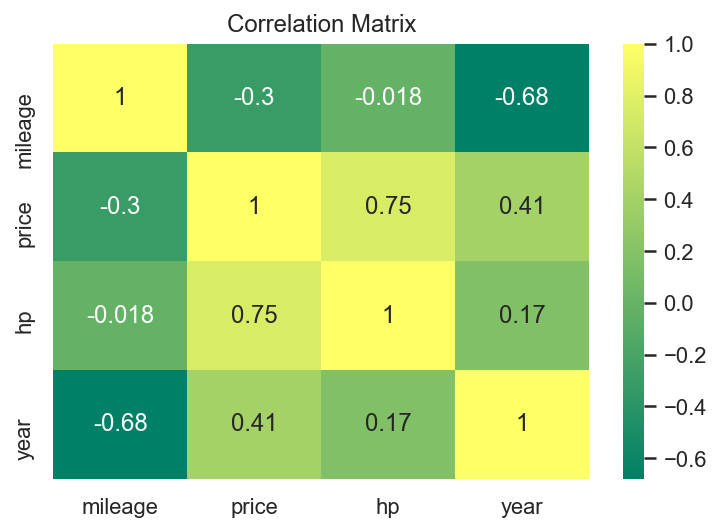

In [133]:
corr = df.corr()
plot = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap = "summer")
plot.set(title = "Correlation Matrix")

It seems as if there is a positive correlation between price and horsepower which makes sense since a more powerful enginer requires additional engineering, and stronger/more expensive materials which will drive up the price. Price and year also have a positive correlation which makes sense since new vehicles have not depreciated and thus will typically cost more. There is a strong negative correlation between year and mileage which also is intuitive since new vehicles will have less time to be driven resulting in less accumulated kilometers. Price and mileage also have a negative correlation, this comes natural as a high mileage vehicle is less desirable for reliability reasons, thus the price is driven down.

To complete the correlation matrix above, a pairplot will be generated which will in turn generate a scatterplot between each variable in the dataframe. This is another method to confirm the correlation between the variables.

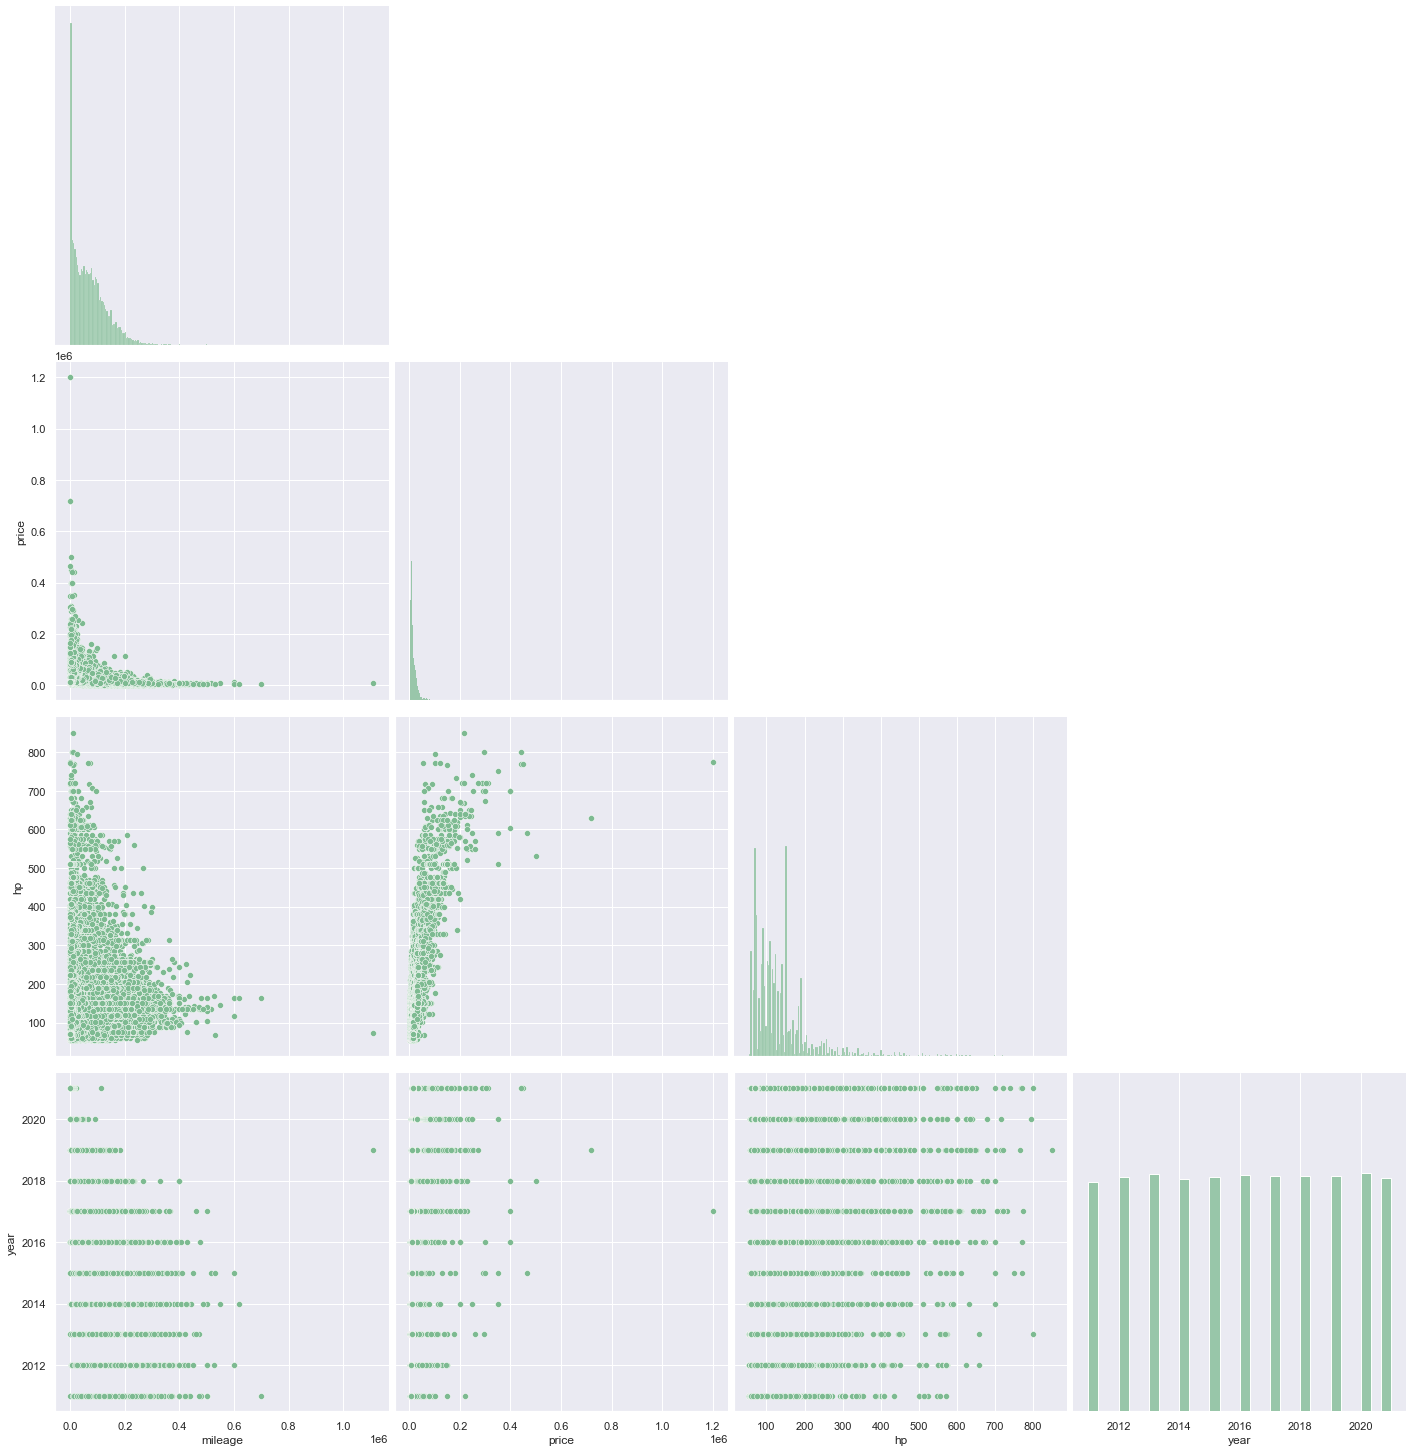

In [135]:
sns.pairplot(df, corner = True)

The same conclusions can be drawn as from the correlation matrix. In particular, the price-mileage negative correlation is extremely clear. It is also interesting to note that vehicles tend to have lower HP, price, and mileage, while cars are distributed farily evenly across the years.

The next step during exploration is to inspect the categorical variables, the first plot to be inspected is a boxplot of the transmission with a strip plot overlayed on it. 

<AxesSubplot:xlabel='price', ylabel='transmission'>

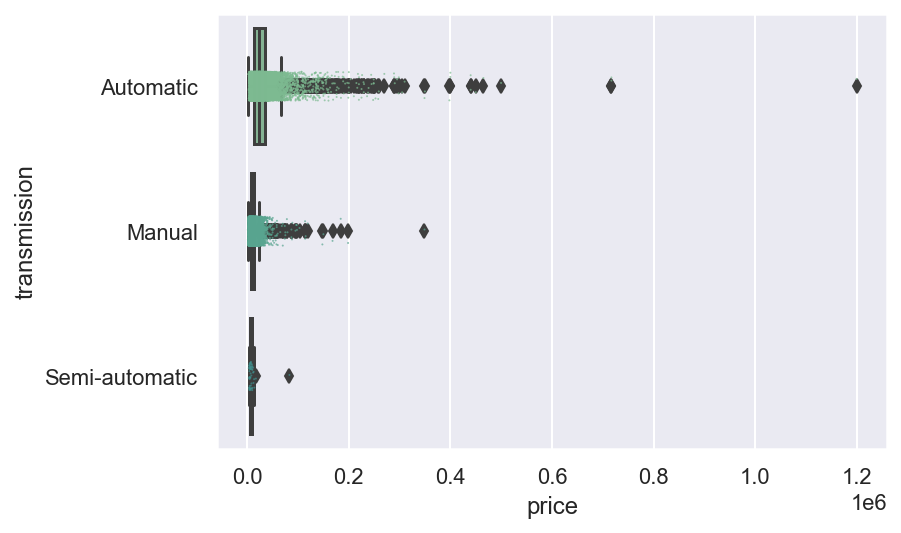

In [125]:
ordered = df.groupby('transmission').median().sort_values('price', ascending=False)["price"].index
sns.boxplot(y="transmission", x="price", data=df, order = ordered)
sns.stripplot(y = "transmission", x = "price", data = df, size=1, alpha = 0.7, order = ordered)

As seen above, the price of a vehicle with automatic transition skews higher than that of a manual transmission. Not only is the mean of the automatic transition price higher then the other options, it also has much higher upper bounds then the other options. 

The final plot of interest is a plot of the median price of each vehicle in descending order on the x axis.

<AxesSubplot:title={'center':'Mean price of vehicles by brand'}, xlabel='Make', ylabel='Price'>

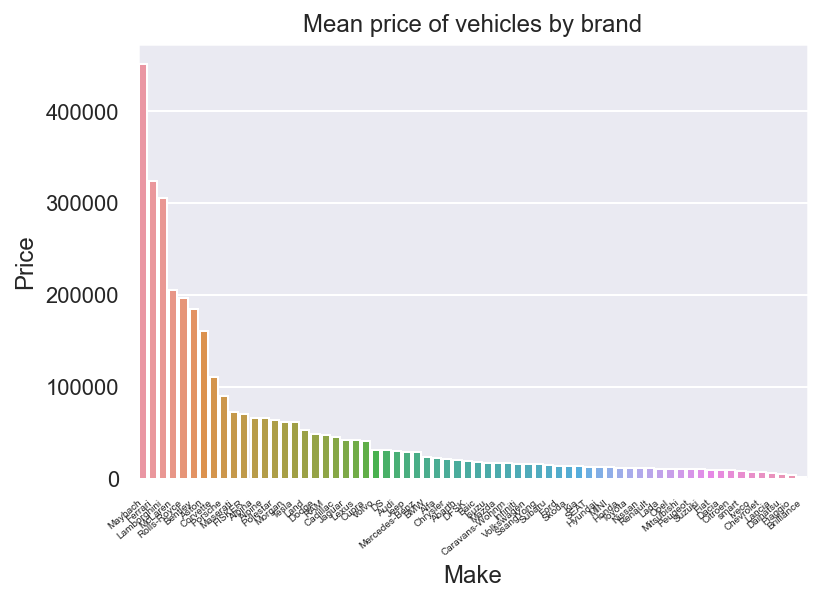

In [176]:
make_price = df.groupby("make")["price"].mean().reset_index().sort_values('price', ascending=False)
plot = sns.barplot(x = "make", y = "price", data = make_price)
plot.set_xticklabels(plot.get_xticklabels(), rotation=40, ha="right", fontsize=5)
plot.set(title="Mean price of vehicles by brand", xlabel="Make", ylabel="Price")
plot

The plot above gives insight into the value of brands vehicles. Unsuprisingly, luxury brands such as Maybach, Gerrari, etc. rank by far higher then other vehicles. It is interesting to note that after the first ~15 luxury brands, the price tailors off and the price remains largely constant throughout to the end. It is clear there is a large discrepency between a few luxury brands, and the rest of the brands for common folk.

## Conducting Analysis